# HSE 

## Лекция 5

### Полина Полунина
polina.polunina@skolkovotech.ru

# Метод опорных векторов. Ядра.


Import packages:

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
#plots
import matplotlib.pyplot as plt
%matplotlib inline
#beautiful plots
import seaborn as sns
#linear regression
import statsmodels.api as sm
#set style for plots
sns.set_style('darkgrid')
#off the warnings
import warnings
warnings.filterwarnings("ignore")

## 1. Метод Опорных Векторов и Задача Регрессии

### Напоминание:

* Неделю назад мы работали с данными о ценах на дома
* Мы искали линейную зависимость между зависимой переменной (Y, Sale Price) и некоторым набором признаков (X)
* Давайте вспомним, что же это были за данные:

In [2]:
cols=['Id', 'MSSubClass', 'LotArea', 'OverallQual',\
      'OverallCond', 'YearBuilt', 'YearRemodAdd',\
      'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',\
     'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',\
     'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',\
     'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',\
     'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',\
     'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

In [3]:
data = pd.read_csv('train.csv', index_col=0, usecols=cols)
data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,150,856,856,854,...,0,61,0,0,0,0,0,2,2008,208500
2,20,9600,6,8,1976,1976,284,1262,1262,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,11250,7,5,2001,2002,434,920,920,866,...,0,42,0,0,0,0,0,9,2008,223500
4,70,9550,7,5,1915,1970,540,756,961,756,...,0,35,272,0,0,0,0,2,2006,140000
5,60,14260,8,5,2000,2000,490,1145,1145,1053,...,192,84,0,0,0,0,0,12,2008,250000


#### Корреляционная матрица:

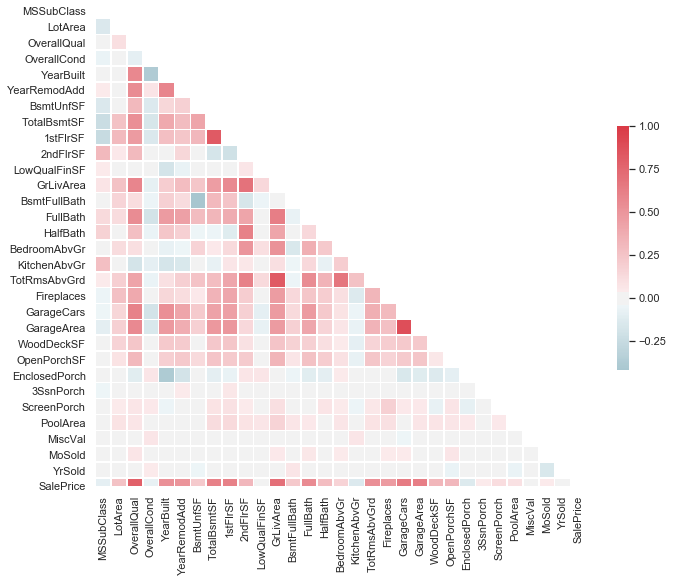

In [4]:
dt=data.copy()
sns.set(style="white")

# Compute the correlation matrix
corr = dt.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### Наилучшая модель, которая у нас получилась, выглядела так (домашнее задание):

In [5]:
X = data.drop(['SalePrice', 'GrLivArea'], axis=1)
Y = data.SalePrice
#add the constant term to the data
X = sm.add_constant(X)
#define the model
model = sm.OLS(Y, X)
#fit the model
results = model.fit()

In [6]:
cols2 = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF',\
         'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',\
 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',\
 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [7]:
# choose alpha level
alpha = 0.05

# perform feature elimination
while results.pvalues[results.pvalues > 0.05].shape[0] > 0:
    use_cols=results.pvalues[results.pvalues != results.pvalues.max()].keys().tolist()
    X = X[use_cols]
    Y = data.SalePrice
    #define the model
    model = sm.OLS(Y, X)
    #fit the model
    results = model.fit()
    #print the results
    #print(results.summary2())
    #print('\n\n\n')

In [8]:
print(results.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.968     
Dependent Variable:     SalePrice        AIC:                         34726.4699
Date:                   2019-11-27 23:52 BIC:                         34821.6214
No. Observations:       1460             Log-Likelihood:              -17345.   
Df Model:               18               F-statistic:                 2482.     
Df Residuals:           1442             Prob (F-statistic):          0.00      
R-squared (uncentered): 0.969            Scale:                       1.2360e+09
---------------------------------------------------------------------------------
                    Coef.      Std.Err.     t     P>|t|      [0.025      0.975]  
---------------------------------------------------------------------------------
MSSubClass         -154.9909    26.0905  -5.9405  0.0000    -206.1703   -103.8115
LotArea               0.4183     0.1004   4.1667 

### Давайте попробуем смоделировать зависимость при помощи линейного SVM

* Какие параметры есть у sklearn-реализации SVR?

In [9]:
SVR?

* Зададим параметры для SVR "из коробки":

In [10]:
regressor = SVR(kernel='linear', verbose=True)

In [11]:
X = data.drop('SalePrice', axis=1)
model = regressor.fit(X,Y)

[LibSVM]

In [12]:
predictions = model.predict(X)

In [13]:
sklearn.metrics.r2_score(Y, predictions)

0.7332931748395889

In [14]:
model.score(X,Y)

0.7332931748395889

* Можно ли сделать "лучше", не переходя к ядрам? 

Попробуем варьировать дефолтные параметры:

In [15]:
C = [0.1, 1, 10, 50, 100]
epsilon = [0.1, 1, 10]

In [17]:
regressor = SVR(kernel='linear', C=10, epsilon=0.01)
model = regressor.fit(X,Y)
predictions = model.predict(X)
sklearn.metrics.r2_score(Y, predictions)

0.7541021453191277

In [ ]:
params = [0.1, 1, 10, 50, 100]
eps = [0.1, 1, 10]
for i in params:
    regressor = SVR(kernel='linear', C=i, epsilon=0.01)
    model = regressor.fit(X,Y)
    predictions = model.predict(X)
    print(sklearn.metrics.r2_score(Y, predictions))

0.7262572532642224
0.7332933503032584
0.7541021453191277
0.7677676374089363


* А теперь давайте посмотрим, как изменится ситуация при использовании ядер:

### SVM c ядрами

* для некоторых ядер требуется "стандартизировать" данные
* два основных способа: нормировка и преобразование к интервалу [0, 1]

In [ ]:
# нормировка
def scale(df):
    return ((df - df.mean()) / df.std())

# преобразование к интервалу [0, 1]
def scaling_to_zero_one(df):
    return (df - df.min()) / (df.max() - df.min())

* что будет без нормировки? **rbf-ядро**

In [ ]:
regressor = SVR(kernel='rbf')
model = regressor.fit(X,Y)
predictions = model.predict(X)
sklearn.metrics.r2_score(Y, predictions)

* а с нормировкой:

In [ ]:
regressor = SVR(kernel='rbf')
model = regressor.fit(scaling_to_zero_one(X),scaling_to_zero_one(Y))
predictions = model.predict(scaling_to_zero_one(X))
sklearn.metrics.r2_score(scaling_to_zero_one(Y), predictions)

In [ ]:
regressor = SVR(kernel='rbf')
model = regressor.fit(scale(X),scale(Y))
predictions = model.predict(scale(X))
sklearn.metrics.r2_score(scale(Y), predictions)

* другие ядра

In [ ]:
SVR?

In [ ]:
regressor = SVR(kernel='poly')
model = regressor.fit(scale(X),scale(Y))
predictions = model.predict(scale(X))
sklearn.metrics.r2_score(scale(Y), predictions)

In [ ]:
plt.figure(figsize=(7,7))
#plt.scatter(scale(Y), predictions)
plt.plot(scaling_to_zero_one(np.arange(Y.shape[0])), scaling_to_zero_one(np.arange(Y.shape[0])))
plt.title('True values vs Predictions')
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

In [ ]:
regressor = SVR(kernel='poly')
model = regressor.fit(scaling_to_zero_one(X),scaling_to_zero_one(Y))
predictions = model.predict(scaling_to_zero_one(X))
sklearn.metrics.r2_score(scaling_to_zero_one(Y), predictions)

In [ ]:
regressor = SVR(kernel='sigmoid')
model = regressor.fit(scale(X),scale(Y))
predictions = model.predict(scale(X))
sklearn.metrics.r2_score(scale(Y), predictions)

In [ ]:
regressor = SVR(kernel='sigmoid')
model = regressor.fit(scaling_to_zero_one(X),scaling_to_zero_one(Y))
predictions = model.predict(scaling_to_zero_one(X))
sklearn.metrics.r2_score(scaling_to_zero_one(Y), predictions)

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(scaling_to_zero_one(Y), predictions)
plt.plot(scaling_to_zero_one(np.arange(Y.shape[0])), scaling_to_zero_one(np.arange(Y.shape[0])))
plt.title('True values vs Predictions')
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

### Задание 1

Подобрать конфигурацию SVR (хоть с ядром, хоть без ядра), которая наилучшим образом моделирует существующую зависимость.
* подобрать ядро
* подобрать параметры

## 2. Метод опорных векторов для задачи классификации

В прошлый раз мы работали с датасетом "ирисы":

In [ ]:
X, Y = sklearn.datasets.load_iris(return_X_y=True)
names = ['sepal length', 'sepal width', 'petal length', 'petal width']
classes = ['setosa', 'versicolor', 'virginica']
#create pandas object
X = pd.DataFrame(X, columns=names)
X.head()

Target variable is already encoded:
    * 0 - Setosa
    * 1 - Versicolor
    * 2 - Verginica
    
<img style="float: left;" src="iris.jpg" br>


Корреляция:

In [ ]:
dt=pd.concat([X,pd.DataFrame(Y, columns=['target'])], axis=1)
sns.set(style="white")

# Compute the correlation matrix
corr = dt.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Красивые графики :)

In [ ]:
sns.pairplot(dt, kind='scatter', hue='target')
plt.show()

**Обычная логистическая регрессия**

In [ ]:
#from sklearn import metrics 
logit = sm.MNLogit(Y, X)
result = logit.fit()
preds=np.argmax(result.predict(X).values,axis=1)
accuracy_score(Y,preds)

**Логистическая регрессия с L1 регуляризацией**

In [ ]:
from sklearn import linear_model
model=sklearn.linear_model.LogisticRegression(penalty='l1',multi_class='multinomial', solver='saga').fit(X,Y)
preds=model.predict(X)
accuracy_score(Y, preds)

**Логистическая регрессия с L2 регуляризацией**

In [ ]:
from sklearn import linear_model
model=sklearn.linear_model.LogisticRegression(penalty='l2',multi_class='multinomial', solver='saga', fit_intercept=True).fit(X,Y)
preds=model.predict(X)
accuracy_score(Y, preds)

### SVC "из коробки"

In [ ]:
clf = sklearn.svm.SVC(kernel='linear')

In [ ]:
model = clf.fit(X,Y)

In [ ]:
predictions = model.predict(X)

In [ ]:
model.score(X,Y)

In [ ]:
accuracy_score(Y, predictions)

* Что с ядрами?

In [ ]:
clf = sklearn.svm.SVC(kernel='rbf')
model = clf.fit(X, Y)
predictions = model.predict(X)
accuracy_score(Y, predictions)

* Почему "работает" без стандартизации?

In [ ]:
X.head()

In [ ]:
X.describe()

* А если добавить стандартизацию?

In [ ]:
clf = sklearn.svm.SVC(kernel='rbf')
model = clf.fit(scale(X), Y)
predictions = model.predict(scale(X))
accuracy_score(Y, predictions)

In [ ]:
clf = sklearn.svm.SVC(kernel='rbf')
model = clf.fit(scaling_to_zero_one(X), Y)
predictions = model.predict(scaling_to_zero_one(X))
accuracy_score(Y, predictions)

* А теперь другие ядра:

In [ ]:
clf = sklearn.svm.SVC(kernel='poly')
model = clf.fit(X, Y)
predictions = model.predict(X)
accuracy_score(Y, predictions)

In [ ]:
clf = sklearn.svm.SVC(kernel='poly')
model = clf.fit(scale(X), Y)
predictions = model.predict(scale(X))
accuracy_score(Y, predictions)

In [ ]:
clf = sklearn.svm.SVC(kernel='poly')
model = clf.fit(scaling_to_zero_one(X), Y)
predictions = model.predict(scaling_to_zero_one(X))
accuracy_score(Y, predictions)

In [ ]:
clf = sklearn.svm.SVC(kernel='sigmoid')
model = clf.fit(X, Y)
predictions = model.predict(X)
accuracy_score(Y, predictions)

In [ ]:
clf = sklearn.svm.SVC(kernel='sigmoid')
model = clf.fit(scale(X), Y)
predictions = model.predict(scale(X))
accuracy_score(Y, predictions)

In [ ]:
clf = sklearn.svm.SVC(kernel='sigmoid')
model = clf.fit(scaling_to_zero_one(X), Y)
predictions = model.predict(scaling_to_zero_one(X))
accuracy_score(Y, predictions)

### Задание 2

Подобрать параметры для SVC, дающие наибольшую точность (accuracy score)

### Analysing the results

Predictions:

In [ ]:
df=pd.concat([X, pd.DataFrame(predictions, columns=['predictions'])], axis=1)
sns.set_style('darkgrid')
sns.lmplot('petal length', 'petal width', df, hue='predictions', scatter=True, fit_reg=False)

**Confusion matrix**

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
sns.set_style('white')
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes,\
                      title='Confusion matrix, without normalization')

plt.show()